# Module 1 - importing and manipulating tabulated data 
-------------------------------------------------------------------------------------------------------

## Table of Content <a id='toc'></a>


1. [Reading the data](#reading)  
    1.1. [The basics](#reading.1)  
    1.2. [Header or not header, that is the question](#reading.2)  
    1.3. [Setting up the row index](#reading.3)  
    1.4. [Other options](#reading.4)  
    1.5. [More formats](#reading.5)  


2. [Data manipulation](#manip)  
    2.1. [Dirst contact with the data](#manip.1)  
    2.2. [Accessing specific parts of the data - rows and columns](#manip.2)  
    2.3. [Accessing specific parts of the data - selection](#manip.3)  
    2.4. [Operations on columns](#manip.4)  
    2.4. [Adding/removing and combining columns and rows](#manip.5)  


3. [Writing DataFrames to disk](#writing)

ANNEX [Tips and tricks](#tricks)


## Introduction

The basis of any statistical analysis is the underlying data, and very often data are stored in a table format:
 * Each line corresponds to an observation (individual, sample, ... ).
 * Each column correspond to a measured variable (height, sex, gene expression, ... ).

In python, the most popular module to read and manipulate tabulated data is certainly **[pandas](https://pandas.pydata.org/)**, a "high-level" module designed for statistics/exploratory data analysis. A great strength of pandas is its **DataFrame** which emulates many of the convenient behavior and syntax of their eponym counterpart in the **R** language.

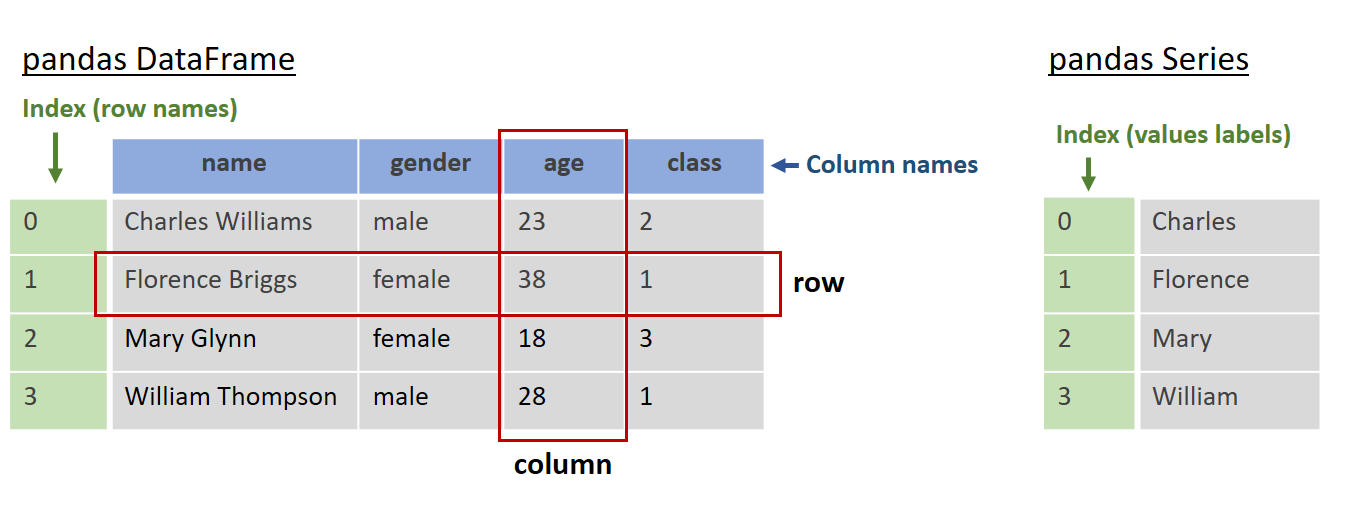

<br>

To graphically represent data, we will rely on **[seaborn](https://seaborn.pydata.org/index.html)**.
Seaborn is designed to work hand-in-hand with pandas DataDrame to produce **efficient data representation** from fairly simple commands. The seaborn official website proposes [very good tutorials](https://seaborn.pydata.org/tutorial.html) as well as a [gallery](https://seaborn.pydata.org/examples/index.html) with associated code to get you started quickly.

<br>

### Loading the pandas and seaborn modules

By convention, pandas is imported as `pd` and seaborn as `sns`:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All modules loaded successfully!")

All modules loaded successfully!


In [2]:
import matplotlib as mpl

# Making the plotted labels a bit bigger for presentation with a projector.
font = {'family': 'DejaVu Sans',
        'weight': 'bold',
        'size'  : 16}

mpl.rc('font', **font)

<br>
<br>

## 1. Reading tabulated data <a id='reading'></a> 

### 1.1 The basics <a id='reading.1'></a> 

In most cases, the data you will need to work with will be stored in a file on disk. The very first step that we must take is therefore to **load the data as a DataFrame**.

**`pd.read_table(<file path and name>)`** is the generalist pandas function to read tabulated data files. Aside from the name and path of the file to read, it supports some useful optional arguments:
* **`sep`**: the separator between columns in the file (by default `"\t"`).
* **`header`**: the row number(s) to use as the column names. By default the first line of a file is
  used as header. Use `header=None` if the file does not contain column names.
* **`skiprows`**: allows to skip the specified rows (lines of the file) during import. This can be either
  a sequence with the lines to skip (0-indexed), or an integer number indicating how many lines to skip
  at the start of the file.

> You can learn (much) more using `help(pd.read_table)` or the [online help](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html).

> By default, python is searching for files in your current working directory. If the file you wish to load
  is not there, you will need to specify its path, either absolute or relative to the working directory.

<br>

Let's now try to load the `data/titanic.csv` file. As its name suggest, this file contains the popular dataset of the ill-fated [Titanic](https://en.wikipedia.org/wiki/Titanic) passengers, travelling from England to New York in April 1912. The data file is named `"titanic.csv"` and like its extension suggests, it contains **C**omma-**S**eparated **V**alues.

> Note the usage of the **`head()`** method of DataFrame to display only its first 5 lines.

In [3]:
import pandas as pd

df = pd.read_table("data/titanic.csv") 
df.head()                                 # By default, head() returns the 5 first lines of a DataFrame.

,"Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked"
0,"Bjornstrom-Steffansson Mr. Mauritz Hakan,male,..."
1,"Coleff Mr. Peju,male,36,3,0,0,7.5,S"
2,"Laroche Miss. Simonne Marie Anne Andree,female..."
3,"Smith Miss. Marion Elsie,female,40,2,1,0,13,S"
4,"Dooley Mr. Patrick,male,32,3,0,0,7.75,Q"


This does not look so great...

<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 1
* Try to fix the cell just above by playing with the option(s) of `pd.read_table`.
    
<div>


<br>

<br>

<center><b>Spoiler alert</b>: do not scroll or be spoiled!</center>

-----


<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

As you have just seen, `pd.read_table()` expects the input data to be **tab-delimited** (by default). Since this is not the case of the `titanic.csv` file, each line was treated as a single field (column), thus creating a DataFrame with a single column.

As implied by its `.csv` extension (for "comma-separeted values"), the `titanic.csv` file contains **comma-delimited** values.  
To load a CSV file, we can either:
* Specify the separator value via the **`sep`** argument: `pd.read_table(<file name>, sep=",")`.
* Use **`pd.read_csv()`**, pandas' dedicated function to load CSV files that uses commas as default separator.

<br>

Let's reload the file with the proper column/field separator:

In [4]:
df = pd.read_table("data/titanic.csv", sep=",") 
# Alternatively: df = pd.read_csv("data/titanic.csv", sep=",")

df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75,Q


<br>
<br>

[back to toc](#toc)

## 1.2 Header or not header, that is the question <a id='reading.2'></a>


Another important aspect of reading data is whether your dataset has a header or not. 
By default, **`pd.read_table()` expects the first line to be a header**, unless you either:
 * Use the argument **`header=None`**.
 * Specify column names using the **`names`** argument.

<br>

Let's try to load a dataset that does not have any header:  
> *Note:* as illustrated in the cell below, `head()` can print any number of lines by passing a
  value to it - here we pass the value `3` to print the first 3 lines of the data frame.

In [5]:
df = pd.read_table("data/titanic_no_header.csv", sep=",") 
df.head(3)

,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28,1,1.1,0,26.55,S
0,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
1,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C
2,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S


As you can see, the **values in the first line were used as column names**... this is not ideal.

Let's correct this:

In [6]:
df = pd.read_table("data/titanic_no_header.csv", sep=",", header=None) 
df.head(3)

,0,1,2,3,4,5,6,7
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


Much better! 

Let's go one step further and **assign our own column names** using the `names` argument of `pd.read_table()`:

In [7]:
df = pd.read_table(
    "data/titanic_no_header.csv",
    sep=",", 
    names = ["name", "column2", "age", "column4", "blip", "bloop", "spam", "eggs"]
)

# As you can see, we can choose our own names, whether they make sense or not.
df.head(3) 

,name,column2,age,column4,blip,bloop,spam,eggs
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


<br>
<br>

[back to ToC](#toc)

## 1.3 Setting the row index <a id='reading.3'></a>

Now that we learned to change column names, let's see how to modify **row names**, which are called the **index**.

> *Note:* not all dataset need a custom index. Oftentimes the default index (numbers starting from 0 
  that correspond to line positions) is enough. It can often also be advantageous to have the index
  correspond to row positions.

There are several options available to modify the index that we will illustrate below.

<br>

### 1.3.1 Input file contains row names (file has one less column names than data fields)

Depending on how the data file was produced, it may already contain row names. Let's see an example of this with the `data/titanic_implicit_index.csv` file. First we will display the "raw" content of our file:

In [8]:
with open("data/titanic_implicit_index.csv", mode="r") as f:
    for x in range(5):
        print(f.readline().strip())

Sex,Age,Pclass,Survived,Family,Fare,Embarked
Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28,1,1,0,26.55,S
Coleff Mr. Peju,male,36,3,0,0,7.5,S
Laroche Miss. Simonne Marie Anne Andree,female,3,2,1,1,41.58,C
Smith Miss. Marion Elsie,female,40,2,1,0,13,S


As can be seen above, the 1st line of the file contains 8 elements, while all other lines contain 9 elements! This is because the first field of the file contains the row names.

> Note: if you are using a Linux or MacOS machine, you could also use the following one-liner shell command:
>
> `!head -n 4 data/titanic_implicit_index.csv`
>
> The leading **`!`** is a special Jupyter Notebook syntax that indicates a call to a shell
> program (here `head`). This allows you to run shell commands from a Jupyter Notebook.

<br>

Let's now try to load this file with pandas to see how it handles it:

In [9]:
df = pd.read_table("data/titanic_implicit_index.csv", sep=",") 
df.head(n=3)

,Sex,Age,Pclass,Survived,Family,Fare,Embarked
Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


In [10]:
df.index[:5]  # access the index directly.

Index(['Bjornstrom-Steffansson Mr. Mauritz Hakan', 'Coleff Mr. Peju',
       'Laroche Miss. Simonne Marie Anne Andree', 'Smith Miss. Marion Elsie',
       'Dooley Mr. Patrick'],
      dtype='object')

When pandas detects this configuration (one more field than column names), it automatically uses the first, nameless, column as index.

<br>

### 1.3.2 Using `index_col` to manually specify the index

Pandas can be instructed to use a specific column of an input file as index via the **`index_col`** argument of `pd.read_table()`. The index column can be indicated either:
* By position (*reminder:* column indexing is zero-based).
* By name.

<br>

**Examples:**

In [11]:
# Index column specified by position: 0 = 1st column.
df = pd.read_table("data/titanic.csv", sep=",", index_col=0)
df.head(3) 

,Sex,Age,Pclass,Survived,Family,Fare,Embarked
Name,,,,,,,
Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


In [12]:
# Index column specified by name.
df = pd.read_table("data/titanic.csv", sep=",", index_col="Name")
df.head(3)

,Sex,Age,Pclass,Survived,Family,Fare,Embarked
Name,,,,,,,
Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


In [13]:
df.columns

Index(['Sex', 'Age', 'Pclass', 'Survived', 'Family', 'Fare', 'Embarked'], dtype='object')

> *Notes:*
>  * removing the name of the index ("Name" in the example above) can be done
>    with: `df.index.name = None`
>  * pandas also has a system of multiple, hierarchised indexing. This is, however,
>    a more specialized and advanced feature.

<br>
<br>

[back to ToC](#toc)

## 1.4 Other `pd.read_table()` options <a id='reading.4'></a>

`pd.read_table()` has a large number of optional arguments. We cannot go though all of them, but here are a few which may be of interest to you:
* `true_values`/`false_values`, each a list. A must if you have columns encoded with "yes"/"no" labels.
* `na_values`: takes a list. Ideal when your NAs are encoded as something unusual (eg, `.`,` `,`-9999`,...).
* `parse_dates`/`infer_datetime_format`/`date_parser`: options to help you handle date parsing, which can
  otherwise be a nightmare - [more on this here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).
* `compression`: your data is in a compressed format (zip, gzip, ...)? Not a problem!



<br>
<br>

[back to ToC](#toc)

## 1.5 Reading other tabulated file formats <a id='reading.5'></a>

As you might expect, pandas is not limited to text, csv/tsv-like files. It can read/write from/to many other file formats:

* `pd.read_excel()`
* `pd.read_json()`
* `pd.read_sql()` 
* ... see [here for an exhaustive list of pandas reader and writer functions](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).



In [14]:
genbank_df = pd.read_json("data/genbank.sub.ndjson", lines=True)
genbank_df.head(3)

,genbank_accession,genbank_accession_rev,database,strain,region,location,collected,submitted,length,host,isolation_source,biosample_accession,title,authors,publications,sequence
0,MW553299,MW553299.1,GenBank,SARS-CoV-2/human/ARG/Cordoba-189-251/2020,South America,Argentina,2020-05-16,2021-02-01T00:00:00Z,29719,Homo sapiens,oronasopharynx,,Severe acute respiratory syndrome coronavirus ...,Direct Submission,,GATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCG...
1,MW553294,MW553294.1,GenBank,SARS-CoV-2/human/ARG/Cordoba-2635-202/2020,South America,Argentina,2020-06-04,2021-02-01T00:00:00Z,29723,Homo sapiens,oronasopharynx,,Severe acute respiratory syndrome coronavirus ...,Direct Submission,,GATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCG...
2,MW553295,MW553295.1,GenBank,SARS-CoV-2/human/ARG/Cordoba-2842-202/2020,South America,Argentina,2020-06-04,2021-02-01T00:00:00Z,29723,Homo sapiens,oronasopharynx,,Severe acute respiratory syndrome coronavirus ...,Direct Submission,,GATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCG...


<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 2
* Read the file `data/pbmc_data.countMatrix.50.txt.zip` as a DataFrame. Determine which is the separator,
  and decide whether there is a header and/or an index column.

<div>


<br>
<br>
<br>

[back to ToC](#toc)

# 2. Data manipulation <a id='manip'></a>
---------------------------------

Now that you know (almost) everything about loading files as a `DataFrame`, let's see what we can actually do with these!


## 2.1 First contact with the data <a id='manip.1'></a>

Gathering basic information about a DataFrame is fairly easy, and we will illustrate this with the titanic data:

In [15]:
# Loading the titanic dataset as a DataFrame.
df = pd.read_table("data/titanic.csv", sep=",")
df.head(3)

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


<br>

* **`df.shape`** returns a tuple with the numbers of rows and columns: `(row_count, col_count)`.

In [16]:
df.shape

(891, 8)

In [17]:
row_count, col_count = df.shape
print('row count:', row_count, '\ncolumn count:', col_count)

row count: 891 
column count: 8


<br>

* **Column names** can be accessed with the **`df.columns`** attribute.
* **Row names** (the index) can be accessed with the **`df.index`** attribute.

> *Note:* here the index is number-based, starting with 0 (this is the default pandas indexing).

In [18]:
print('column names:\n', df.columns)
print('index (row names):\n', df.index)

print('\ncolumn names:', list(df.columns))
print('row names   :', list(df.index)[:10], "...")

column names:
 Index(['Name', 'Sex', 'Age', 'Pclass', 'Survived', 'Family', 'Fare',
       'Embarked'],
      dtype='object')
index (row names):
 RangeIndex(start=0, stop=891, step=1)

column names: ['Name', 'Sex', 'Age', 'Pclass', 'Survived', 'Family', 'Fare', 'Embarked']
row names   : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ...


<br>

* The **`df.columns`** and **`df.index`** attributes can also be used to set new values for column names
  and index labels.

In [19]:
# Print the start of the DataFrame for reference.
df.head(3)

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


In [20]:
# Change the column names to upper case.
df.columns = [x.upper() for x in df.columns]

# Change the row names.
df.index = [f"passenger_{i}" for i in df.index]
df.head(3)

,NAME,SEX,AGE,PCLASS,SURVIVED,FAMILY,FARE,EMBARKED
passenger_0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
passenger_1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
passenger_2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


In [21]:
# Let's reset out changes in index and column names:
df.columns = df.columns.str.capitalize()
df.index = range(0, df.shape[0])
df.head(3)

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


> *Note:* how did we apply a `str` function to all the column names at once?  
>  That is a very powerful feature of DataFrame, which we'll discuss later.

<br>

Each column of a DataFrame has an associated **data type**, which controls the operations you may perform on it. Our example DataFrame contains the following data types:
* **`object`**: catch all for text, intermixed or not with numbers.
* **`float64`** : float.
* **`int64`** : integer.

In [22]:
print("columns types:\n", df.dtypes, sep="")  # List the type of each column in the df DataFrame.

columns types:
Name         object
Sex          object
Age         float64
Pclass        int64
Survived      int64
Family        int64
Fare        float64
Embarked     object
dtype: object


Other types exist. The main types are :
    
 * **object**: catch-all type (includes strings).
 * **int64**: integers.
 * **float64**: floats.
 * **bool**: booleans.
 * **datetime64**: date and time points.
 * **category**: categorical data with fixed possible values.
 

To change the type of a column, the simplest is to use the `.astype` method:

In [23]:
# Change column type from float to object.
FareStr = df.Fare.astype(str)

# It can then be manipulated as a string.
FareStr = '$' + FareStr
FareStr.head()

0    $26.55
1      $7.5
2    $41.58
3     $13.0
4     $7.75
Name: Fare, dtype: object

<br>

In the case of the titanic data, the passenger class is not really a number, and may be better represented as a **`category`** variable.

In [24]:
df.Pclass = df.Pclass.astype("category")
df.Pclass.head()

0    1
1    3
2    2
3    2
4    3
Name: Pclass, dtype: category
Categories (3, int64): [1, 2, 3]

category-specific methods to apply to the column can then be accessed with **`.cat`**.

In [25]:
# For instance, we could change the labels of the categories:
df.Pclass= df.Pclass.cat.rename_categories(
    {
        1: "I",
        2: "II",
        3: "III"
    }
)
df.Pclass.head()

0      I
1    III
2     II
3     II
4    III
Name: Pclass, dtype: category
Categories (3, object): ['I', 'II', 'III']

> Note: [datetime64](https://pandas.pydata.org/docs/user_guide/timeseries.html) and [category](https://towardsdatascience.com/staying-sane-while-adopting-pandas-categorical-datatypes-78dbd19dcd8a) are fairly specific types, and we refer you to the provided links if you want to learn more about them.


<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 3

A typical use case: you were given badly formatted data and you have to curate it. In this example, you will generate a column that contains percentages followed by a `%` sign. To generate this data, copy-paste the following line in a new code cell:

```python
percent_column = pd.Series(np.random.randint(0,100,100), dtype="str") + '%' 
```

<br>

**Your mission**: get this column into usable usable numbers by:
* Removing the trailing `%`.
* Converting the values to integers.

<div>


<br>
<br>
<br>

[back to ToC](#toc)

## 2.2 DataFrame subsetting - accessing specific rows and columns <a id='manip.2'></a>

### 2.2.1 Accessing single/multiples columns by name

Columns of a DataFrame can be accessed with the syntax:
* **`df[<column name>]`** or **`df.<column name>`** - select a single column.
* **`df[[<column name>, <column name>, ... ]]`** - select multiple columns. Note that the column names
  must be passed as a **`list`**.

In [26]:
# (Re)Load the titanic dataset as a DataFrame and display it for reference.
df = pd.read_table("data/titanic.csv", sep=",")
df.head(3)

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


<br>

* Select a **single column**. This returns a pandas "Series".

In [27]:
df["Sex"]

0        male
1        male
2      female
3      female
4        male
        ...  
886    female
887    female
888      male
889    female
890      male
Name: Sex, Length: 891, dtype: object

> *Note:* `pandas` only prints first and last 5 rows of the column to avoid clogging your screen, as well as some useful info.

Alternatively, we can also use the syntax **`df.<column name>`**

In [28]:
df.Age

0      28.0
1      36.0
2       3.0
3      40.0
4      32.0
       ... 
886    21.0
887    51.0
888    28.0
889     5.0
890    64.0
Name: Age, Length: 891, dtype: float64

<br>

* Selecting **multiple columns**. This returns a "subset/slice" of DataFrame object.

> **WARNING:** depending on the situation, subsetting a data frame can return a copy of
> the DataFrame or the DataFrame itself.  
> See the "Copy or not copy" section below for details.

In [29]:
df[["Age", "Sex"]].head()

,Age,Sex
0,28.0,male
1,36.0,male
2,3.0,female
3,40.0,female
4,32.0,male


<br>

The colum selection also allows to **add new columns** or **edit** them:

In [30]:
df["Citizenship"] = "UK"
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked,Citizenship
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S,UK
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S,UK
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C,UK
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S,UK
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75,Q,UK


In [31]:
df["Citizenship"] = "USA"
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked,Citizenship
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S,USA
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S,USA
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C,USA
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S,USA
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75,Q,USA


In [32]:
# Remove the column we just added.
df.drop("Citizenship", axis=1, inplace=True)

<br>

### 2.2.2 Subsetting a DataFrame with the `loc[]` and `iloc[]` indexers

A very common operation to perform on DataFrames is to create a subset by selecting certain rows and/or columns.  
There are 2 methods in pandas to perform a selection on a DataFrame (here `df`):
* **Position based:** using `df.iloc[<row selection>, <column selection>]`
* **Index/label based:**  using `df.loc[<row selection>, <column selection>]`

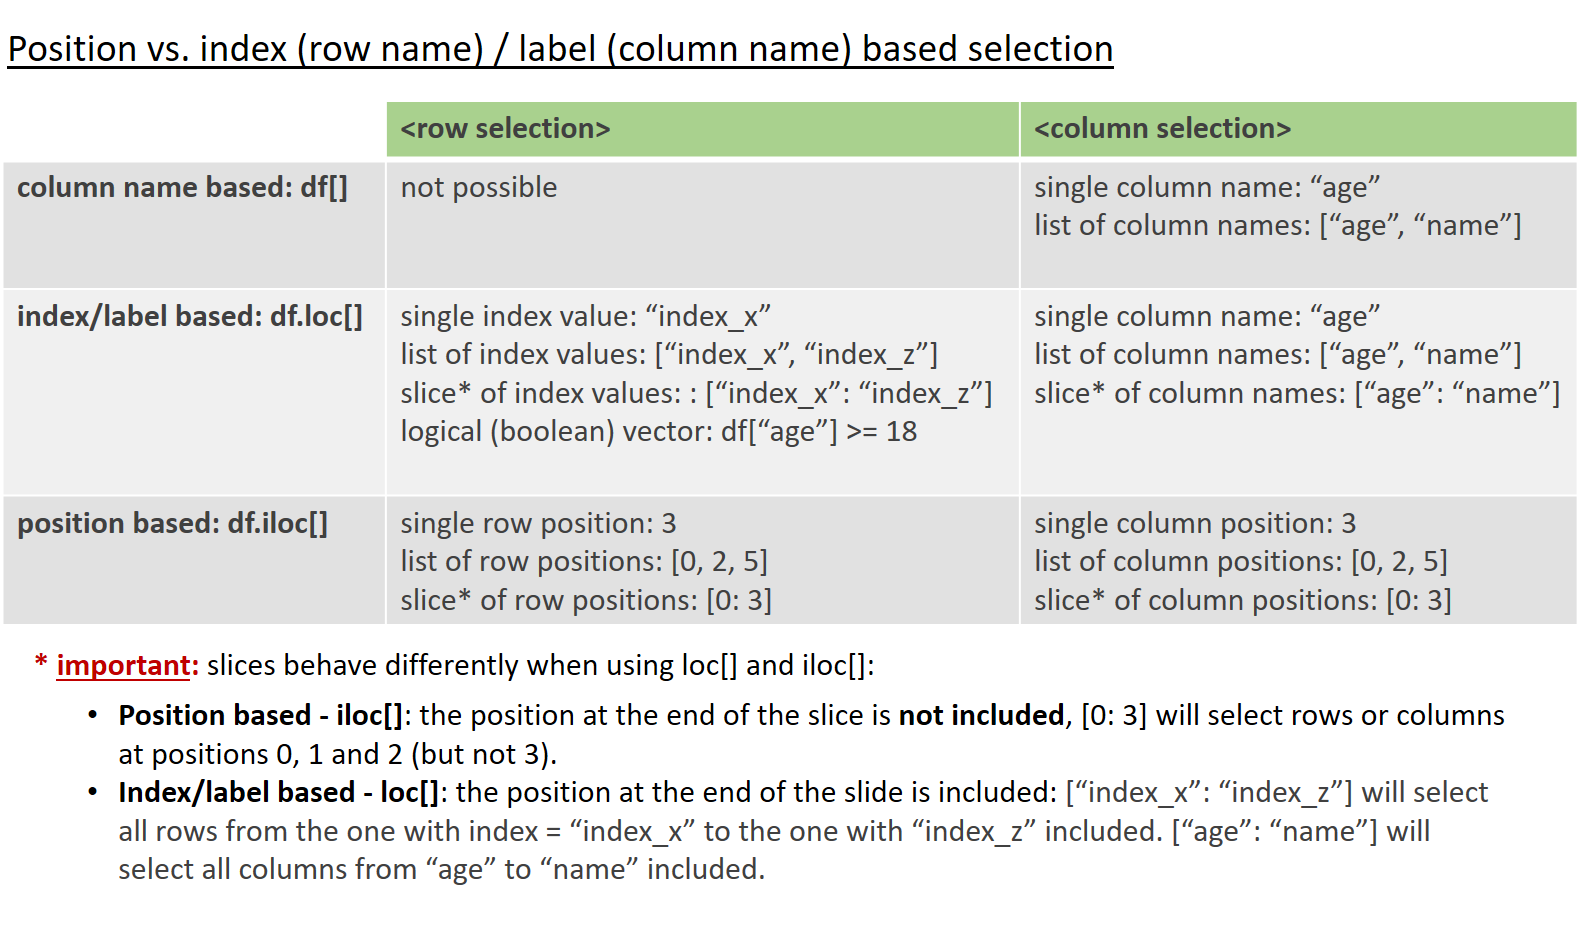

To select all rows/or columns, the symbol **`:`** can be used as row or column selection. It works with both `.loc[]` and `.iloc[]`:
* `df.loc[<row selection>, :]` - select all columns.
* `df.loc[:, <column selection>]` - select all rows.

> *Note:* when selecting on rows only (i.e. select all columns), the `df.loc[<row selection>, ]`
  and `df.loc[<row selection>]` syntaxes are also possible. The `:` is not compulsory in that case).

<br>

**Common pitfall with slicing:** `loc[]` includes the end index, but `iloc[]` does not:

In [33]:
df.loc[0:3, :]    # This selects the first 4 rows.

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S


In [34]:
df.iloc[0:3, :]   # This selects the first 3 rows.

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


<br>

**Examples:** let's apply what we have learned about `loc[]` and `iloc[]`.
* Select the first 3 rows, and all columns:

In [35]:
df.loc[0:2, :]

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


* Select the first 3 rows the columns "Pclass", "Name" and "Age".

> *Note:* I am free to select a column several time, in whichever order I wish. This can thus be used to
  **re-order columns** in a DataFrame.

In [36]:
df.loc[0:2, ['Pclass', 'Name', 'Age', 'Name']]

,Pclass,Name,Age,Name
0,1,Bjornstrom-Steffansson Mr. Mauritz Hakan,28.0,Bjornstrom-Steffansson Mr. Mauritz Hakan
1,3,Coleff Mr. Peju,36.0,Coleff Mr. Peju
2,2,Laroche Miss. Simonne Marie Anne Andree,3.0,Laroche Miss. Simonne Marie Anne Andree


In [37]:
df.loc[ :, "Name":"Fare" ]   # select all rows, and columns from column 'Name' to column "Fare".

,Name,Sex,Age,Pclass,Survived,Family,Fare
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75
...,...,...,...,...,...,...,...
886,Ryerson Miss. Susan Parker,female,21.0,1,1,2,262.38
887,Hogeboom Mrs. John C (Anna Andrews),female,51.0,1,1,1,77.96
888,Vanden Steen Mr. Leo Peter,male,28.0,3,0,0,9.50
889,Baclini Miss. Marie Catherine,female,5.0,3,1,2,19.26


In [38]:
df.iloc[0:2, [0,2,3]]         # select the first 2 rows, and columns 0,2 and 3.

,Name,Age,Pclass
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,28.0,1
1,Coleff Mr. Peju,36.0,3


In [39]:
df.iloc[0, [0,2,3]]           # select the first row, and columns 0,2 and 3.

Name      Bjornstrom-Steffansson Mr. Mauritz Hakan
Age                                           28.0
Pclass                                           1
Name: 0, dtype: object

<br>

**Question:**
* What type of object do we get when selecting a single row/column? You may have noticed that it does not get represented as a list, so what is it?

In [40]:
# Select a single row:
row_4 = df.iloc[3,]
row_4b = df.loc[3,]
print(type(row_4))
print(type(row_4b))

# Select a single column. Note that when selecting by columns only, ":" must be used to indicate
# that all rows should be selected.
col_age_a = df.loc[:,"Age"]
col_age_b = df.iloc[:,3]
col_age_c = df["Age"]          # When selecting based on columns only, using this syntax is simpler.
print(type(col_age_a))
print(type(col_age_b))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


These are pandas **`Series`**. They are the equivalent of `DataFrame`, but **1-dimensional** (so essentially they are a **named vector** of values).  
Their elements can be accessed in quite a similar way:

In [41]:
print(row_4)
print("\n---\n")
print(row_4[0])   # Access an item by position.
print("\n---\n")
print(row_4.Age)  # Access an item by name.

Name        Smith Miss. Marion Elsie
Sex                           female
Age                             40.0
Pclass                             2
Survived                           1
Family                             0
Fare                            13.0
Embarked                           S
Name: 3, dtype: object

---

Smith Miss. Marion Elsie

---

40.0


<br>

<div class="alert alert-block alert-success">
    
### Micro-Exercise 4
* Select all odd rows from the Titanic data frame, as well as the columns "Name", "Age" and "Fare".
* Re-order the columns so that "Age" is first and "Name" is second.

**Hint:** we will see how to perform conditonal selection later, but for now you can use the `range()` function to help you with this task.

<br>


<br>
<br>

[back to ToC](#toc)

## 2.3 Accessing specific rows of a DataFrame - conditional selection <a id='manip.3'></a>

Another, powerful, way of accessing specific part of a DataFrame is by **filtering through a particular condition** (conditional selection).  
This is frequently done my first creating a **mask**, which is then applied to filter the DataFrame:
* A mask (a pandas **Series** object), is a vector of boolean values that are `True` or `False`
  depending on whether or not a rows satisfies to the defined condition (in the example below, the value
  of the row in the `Sex` column must be equal to "male").

In [42]:
mask_male = df["Sex"] == "male"   # This creates a vector of booleans (True/False).
mask_male.head()

0     True
1     True
2    False
3    False
4     True
Name: Sex, dtype: bool

Now that the mask is created, we can use it to filter our `DataFrame` and keep only those rows corresponding to male passengers.

In [43]:
print("Number of male passengers:", df.loc[mask_male, ["Sex","Fare","Survived"]].shape[0])
df.loc[mask_male, ["Sex","Fare","Survived"]]

Number of male passengers: 577


,Sex,Fare,Survived
0,male,26.55,1
1,male,7.50,0
4,male,7.75,0
5,male,26.00,0
7,male,8.40,0
...,...,...,...
880,male,27.72,0
882,male,6.50,0
884,male,63.36,1
888,male,9.50,0


<br>

A great method of `Series` containing categorical kind of data (such as `True`/`False` values only) is **`values_counts()`**.


In [44]:
mask_male.value_counts()

True     577
False    314
Name: Sex, dtype: int64

<br>

### Combining selection conditions

Selection conditions can be combined to produce more complex selection criteria.  
* Conditions are combined using the **`&`** (logical AND) and **`|`** (logical OR) operatros.
* **Important:** each conditions must be surrounded by brackets: `( ... ) & ( ... )`.

In [45]:
# Select male passengers with a fare > 200
mask = (df[ 'Sex' ] == 'male') & (df.Fare > 200) 
df.loc[mask, ]

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
195,Robbins Mr. Victor,male,NaN,1,0,0,227.53,C
292,Baxter Mr. Quigg Edmond,male,24.0,1,0,0,247.52,C
359,Widener Mr. Harry Elkins,male,27.0,1,0,0,211.50,C
375,Farthing Mr. John,male,NaN,1,0,0,221.78,S
629,Lesurer Mr. Gustave J,male,35.0,1,1,0,512.33,C
720,Cardeza Mr. Thomas Drake Martinez,male,36.0,1,1,0,512.33,C
723,Fortune Mr. Charles Alexander,male,19.0,1,0,3,263.00,S
820,Fortune Mr. Mark,male,64.0,1,0,1,263.00,S


In [46]:
# Select all people that are either < 25 or women.
df.loc[(df.Age < 25) | (df.Sex == "female"), :]

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S
6,Goodwin Miss. Lillian Amy,female,16.0,3,0,5,46.90,S
8,Fleming Miss. Margaret,female,NaN,1,1,0,110.88,C
10,Panula Master. Juha Niilo,male,7.0,3,0,4,39.69,S
...,...,...,...,...,...,...,...,...
884,Greenfield Mr. William Bertram,male,23.0,1,1,0,63.36,C
885,Baclini Miss. Eugenie,female,1.0,3,1,2,19.26,C
886,Ryerson Miss. Susan Parker,female,21.0,1,1,2,262.38,C
887,Hogeboom Mrs. John C (Anna Andrews),female,51.0,1,1,1,77.96,S


> **Reminder: `.iloc[]` does not support boolean results (True/False) for row selection**: it requires row positions. One can hack its way through that by calling the index of a mask, or using the [query method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)


<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 5
* Select the fare and name of passengers in first class (`Pclass` is `1`) that are less than 18 years old.
* **If you have time:** what fraction of these passengers survived?
<div>


<br>
<br>

[back to ToC](#toc)

## 2.4 Operations on columns <a id='manip.4'></a>

A great strength of pandas DataFrame is that they allow to use arithmetic operators directly on columns:

In [47]:
# Print the DataFrame for reference.
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75,Q


In [48]:
# Increase the age of all passengers by 1 year.
df["Age"] = df["Age"] + 1
df.Age.head()

0    29.0
1    37.0
2     4.0
3    41.0
4    33.0
Name: Age, dtype: float64

In [49]:
df["Age"] -= 1   # same as df["Age"] = df["Age"] - 1
df.Age.head()

0    28.0
1    36.0
2     3.0
3    40.0
4    32.0
Name: Age, dtype: float64

This syntax becomes quite powerful as we can now very easily apply opperations accross entire columns.
For instance, consider this data from the 1880 swiss census:
* The `Total` column gives the total number of registered inhabitants in the given town.
* The `Male` columns gives the number of men.

In [50]:
df_census = pd.read_table("data/swiss_census_1880.csv", sep=",")
df_census.loc[:5, ["town name", "Total", "Male"]]

,town name,Total,Male
0,Aeugst,646,319
1,Affoltern am Albis,2201,1055
2,Bonstetten,771,361
3,Hausen,1363,640
4,Hedingen,907,448
5,Kappel,819,432


<br>

To get the fraction of men in each town, we can now simply write:

In [51]:
df_census.Male / df_census.Total

0       0.493808
1       0.479328
2       0.468223
3       0.469552
4       0.493936
          ...   
3185    0.538012
3186    0.501712
3187    0.541963
3188    0.459606
3189    0.458578
Length: 3190, dtype: float64

<br>

Better yet: we can assign our result to a **new column as if we were adding a key to a dictionnary**:

In [52]:
df_census["Male Fraction"] = df_census.Male / df_census.Total
df_census.loc[:, ["town name", "Total", "Male", "Male Fraction"]].head()

,town name,Total,Male,Male Fraction
0,Aeugst,646,319,0.493808
1,Affoltern am Albis,2201,1055,0.479328
2,Bonstetten,771,361,0.468223
3,Hausen,1363,640,0.469552
4,Hedingen,907,448,0.493936


<br>

These row value assignment operations can be combined with a selection operation, allowing e.g. to modify the values of certain rows in a DataFrame based on a certain condition.

This is particularly useful when you want to mark some data as NAs for instance. Let's magine that, for some reason, the fares of class 3 passengers (in the Titanic dataset) are not valid. We want to set them to NA:

In [53]:
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75,Q


In [54]:
# NA is represented using pd.NA
df.loc[df.Pclass=="III", 'Fare'] = pd.NA
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.5,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.0,S
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75,Q


<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 6
* Children under the age of 10 get a special discount of 50% on their fare.
  Apply this by dividing by 2 the `Fare` of eligible passenger in the `df` DataFrame.

</div>

<br>

### Applying custom functions on columns

As we have just seen, pandas DataFrame allow easy arithmetics on the elements of a column.  
But it is also possible to apply any custom function on the elements of a column using the **`.map()`** method.
* General syntax: `df[<column name>].map(<function to apply>)`

<br>

**Example**

In [55]:
def silly_function( x ):
    """Return "even" if x is divisible by 2, otherwise return "odd"."""
    if x % 2 == 0 :
        return "even"
    return "odd"

for x in range(3):
    print(f"{x} -> {silly_function(x)}")

0 -> even
1 -> odd
2 -> even


Let's now apply our `silly_function` to (each element of) the `Age` column.  
> Note: This does not modify the content of the DataFrame, but returns a pandas Series object.

In [56]:
df.Age.map(silly_function)

0      even
1      even
2       odd
3      even
4      even
       ... 
886     odd
887     odd
888    even
889     odd
890    even
Name: Age, Length: 891, dtype: object

<br>

### Interlude: copy or not copy?

What happens if we select a subset of a DataFrame and modify it? Does the original data stay the same?

In [57]:
df = pd.read_table("data/titanic.csv", sep=",")

In [58]:
df.loc[df.Sex == "male", : ].head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75,Q
5,Kantor Mr. Sinai,male,34.0,2,0,1,26.00,S
7,Olsen Mr. Karl Siegwart Andreas,male,42.0,3,0,0,8.40,S


In [59]:
df.loc[df.Sex == "male", "Age"] = 999
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,999.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,999.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S
4,Dooley Mr. Patrick,male,999.0,3,0,0,7.75,Q


In the above example, pandas changes the values of the `Age` column in the original `DataFrame` object.

In general, `pandas` avoids doing copies when it can... but let's try another example:

In [60]:
# Assign the subset to a new variable.
df_male = df.loc[df.Sex == 'male', :]

In [61]:
# Setting the age to 888 in the subset dataframe of males:
df_male.Age = 888

/tmp/ipykernel_876096/592099321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male.Age = 888


What's this? We get a warning!

In [62]:
df_male.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,888,1,1,0,26.55,S
1,Coleff Mr. Peju,male,888,3,0,0,7.50,S
4,Dooley Mr. Patrick,male,888,3,0,0,7.75,Q
5,Kantor Mr. Sinai,male,888,2,0,1,26.00,S
7,Olsen Mr. Karl Siegwart Andreas,male,888,3,0,0,8.40,S


In [63]:
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,999.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,999.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S
4,Dooley Mr. Patrick,male,999.0,3,0,0,7.75,Q


In this case, the change is made to `df_male` only and not to the original DataFrame `df`.

Sadly, it is not always that easy to get when you get a **view** or a **copy**.

![image.png](img/view_copy.png)


 * **View:** pointer to the original DataFrame.
 * **Copy:** new DataFrame. Modifying a copy leaves the original data untouched.

In general, **using `.loc[]` should return a view**, however that also depends on the evaluation order of some of the performed operations.

To make sure to get a copy, it is recommended to use the **`copy()`** method of DataFrame:

In [64]:
# Explicitly create a copy of the DataFrame returned by .loc[]
df_male = df.loc[df.Sex == 'male', : ].copy()

# Now we don't get a warning anymore:
df_male.Age = 888

This issue is quite complex, but as you are likley to encounter this warning at some point, it is better to have the cat out of the bag now. Here is a recommended reading if you wish to get a more [in-depth explaination of view vs. copy](https://www.dataquest.io/blog/settingwithcopywarning).


<br>
<br>

[back to ToC](#toc)


## 2.5 Adding, removing and combining columns and rows <a id='manip.5'></a>


In [65]:
# (Re)load the Titanic dataset.
df = pd.read_table("data/titanic.csv", sep=",")

We have already seen how to create a new column: associate a column name (key) and a sequence (values) of a number of elements corresponding to the number of rows in the `DataFrame`:

In [66]:
import numpy.random as rd

df['Discount'] = rd.random(df.shape[0])   # Reminder: .shape[0] returns the number of rows in a DataFrame.
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked,Discount
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S,0.533612
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S,0.878829
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C,0.427288
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S,0.012409
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75,Q,0.516143


You can also create a new column from existing ones:

In [67]:
df['Discounted_Fare'] = ( 1 - df.Discount ) * df.Fare
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked,Discount,Discounted_Fare
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S,0.533612,12.382596
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S,0.878829,0.908785
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C,0.427288,23.813371
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S,0.012409,12.838681
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75,Q,0.516143,3.749889


<br>

### Removing columns and rows

* **`df.drop()`** is used to remove columns or rows of a DataFrame.
* Use the **`columns`** keyword argument to delete columns: `df.drop(columns="column_to_delete")`.
* Use the **`index`** keyword argument to delete rows: `df.drop(index="row_to_delete")`.
* Alternatively, specify the column/row names and use `axis=0` (delte rows) or `axis=1` (delete columns).
* The optional **`inplace`** argument specifies whether the original DataFrame should be modified 
  (`inplace=True`), or if a copy should be returned (`inplace=False`). Defaults to `False`.

In [68]:
col = 'Discounted_Fare'
df2 = df.drop(columns=col)            # Note: inplace defaults to False. This creates a copy.

print("is", col, "in df :" , col in df.columns)
print("is", col, "in df2:" , col in df2.columns)

is Discounted_Fare in df : True
is Discounted_Fare in df2: False


<br>

* Delete the column from the original DataFrame with `inplace=True`:

In [69]:
df2 = df.drop(columns=col, inplace=True) 

print("is", col, "in df:" , col in df.columns)
print("df2 is", df2)                           # with inplace=True, the .drop() method returns None.

is Discounted_Fare in df: False
df2 is None


In [71]:
## let's re-create df2 for use later
df2 = df

In [74]:
col

'Discounted_Fare'


<br>

### Adding rows

Several options exist to add or edit rows of a DataFrame:


* Assign a sequence to a new row (or an existing one to overwrite it).  
  **Important:** the sequence must have the same lenght as there are columns in the DataFrame.

In [75]:
df2.loc[len(df2),:] = ["Bob", "male", 27, 3, 1, 0, 10, "S",0.5]
df2.tail()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked,Discount
888,Vanden Steen Mr. Leo Peter,male,28.0,3.0,0.0,0.0,9.50,S,0.562037
889,Baclini Miss. Marie Catherine,female,5.0,3.0,1.0,2.0,19.26,C,0.312058
890,Nicholson Mr. Arthur Ernest,male,64.0,1.0,0.0,0.0,26.00,S,0.245705
891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892,Bob,male,27.0,3.0,1.0,0.0,10.00,S,0.500000


<br>

* Assign a `Series` to a new row (or an exiting row, to overwrite it).
   > Note: in that case, missing fields are allowed.

In [76]:
new_passenger = pd.Series({"Name": "Alice", "Sex": "female", "Fare": 95 , "Discount":0.25})
df2.loc[len(df2),:] = new_passenger
df2.tail()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked,Discount
889,Baclini Miss. Marie Catherine,female,5.0,3.0,1.0,2.0,19.26,C,0.312058
890,Nicholson Mr. Arthur Ernest,male,64.0,1.0,0.0,0.0,26.00,S,0.245705
891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892,Bob,male,27.0,3.0,1.0,0.0,10.00,S,0.500000
893,Alice,female,NaN,NaN,NaN,NaN,95.00,NaN,0.250000


<br>

* Concatenate a DataFrame with another `DataFrame` or `Series` using  **`pd.concat()`**, which takes a list of `DataFrame` or `Series`:

In [77]:
df = pd.read_table("data/titanic.csv", sep=",")
df2 = pd.concat(
    [
        df,
        pd.DataFrame(
            {
                "Name":"The Mr. Doctor",
                "Sex":"fluid",
                "Age":pd.NA,
                "Pclass":2,
                "Survived":pd.NA,
                "Family":pd.NA,
                "Fare":42.00,
                "Embarked":pd.NA,
                "Discount":pd.NA
            },
        index=[df.shape[0]])
    ]
)
df2.tail()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked,Discount
887,Hogeboom Mrs. John C (Anna Andrews),female,51.0,1,1,1,77.96,S,NaN
888,Vanden Steen Mr. Leo Peter,male,28.0,3,0,0,9.50,S,NaN
889,Baclini Miss. Marie Catherine,female,5.0,3,1,2,19.26,C,NaN
890,Nicholson Mr. Arthur Ernest,male,64.0,1,0,0,26.00,S,NaN
891,The Mr. Doctor,fluid,<NA>,2,<NA>,<NA>,42.00,<NA>,<NA>


<br>
<br>

<br>

<div class="alert alert-block alert-success">

## Exercise 1 - data manipulation

</div>


Using the Titanic dataset:

1. Select passengers which survived. How many are males/females?
2. Create a new column `Title` in the `DataFrame` representing the title by which passengers should
   be addressed. The title can be found in the passenger name and is the only word ending with a `.`
   
   **Hint for question 2:** there is no *easy, one-line* answer. Create a function to extract the
   title from the name and work your way from there.
   

In [78]:
m_survived = df.Survived == 1

df.loc[m_survived , 'Sex'].value_counts()


female    233
male      109
Name: Sex, dtype: int64

Uncomment the following to load solutions:

In [ ]:
# %load -r 1-3 solutions/solution_01_01.py
# 1. Select passengers which survived. How many are males/females?

In [ ]:
# %load -r 4- solutions/solution_01_01.py
#2. Create a new column Title is the DataFrame representing the title by which passengers should be addressed. The title can be found in the passenger name and is the only word ending with a '.'

<br>
<br>
<br>

[back to ToC](#toc)


# 3. Writing DataFrames to disk <a id='writing'></a>
------------------------------------------------------------

Writing a DataFrame to disk is very similar to reading it from disk.  
There are several functions depending on the format in which the data should be stored. Here are some examples:
* **`to_csv()`**: write a DataFrame as comma-separated file, or any other separator-delimited format such as
  tab-delimited. 
* **`to_excel()`**: write a DataFrame in Excel format.
* **`to_html()`**: write a DataFrame in HTML format.
* See [here for more writer functions...](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

These functions take similar arguments as the reader functions. E.g., when using the `to_csv()` writer functions, some useful arguments are:
* `sep`: the type of delimiter to use. By default, `sep=","`. To write a tab-delimited file e.g., one would
  set `sep="\t"`.
* `header=None`: to not include the header in the exported file.

<br>

**Example:** write the `df` DataFrame to a file named `my_data.csv` in the current working directory.

In [79]:
df.to_csv('my_data.csv')

<br>
<br>
<br>

[back to ToC](#toc)

# ANNEX -  tips and tricks <a id='tricks'></a>
---------------------------

A collection of handy tricks that don't belong anywhere specific but are nice to know.

## ANNEX 1 Applying custom functions to a DataFrame by rows or columns

As we have just seen, pandas DataFrame have a number of built-in methods - e.g. `describe()`, `count()`, `mean()` - that can be applied row-wise or column-wise.

But it is also possible to apply any custom function on rows/columns using **`apply(func, axis)`**:
* `func`: the function to apply.
* `axis=0` to apply the function row-wise (this is the default), or `axis=1` to apply it column-wise.

For example, let's implement our own version of the built-in [`mean()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html).

**Note:** the `apply()` function only works on DataFrames. To apply a custom function to each element in a Series 
(e.g. a single column of a DataFrame), the `map()` function can be used. E.g.: `df["Survived"].map(func)`

<br>

**Example**

In [80]:
# Print the DataFrame as a reminder:
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75,Q


In [81]:
def longest_str(seq):
    max_len = -1
    max_value = ''
    for x in seq:
        length = len(str(x))
        if length > max_len:
            max_len = length
            max_value = x
    return max_value

# Test of the longest_str() function on dummy data:
print("The longest string is:", longest_str(("eggs", "hello world", "helloworld", "spam")), "\n")

The longest string is: hello world 



In [82]:
# Apply custom function by column (i.e row with the most characters in each column):
print(df.apply(longest_str, axis=0), "\n")

Name        Brown Mrs. Thomas William Solomon (Elizabeth C...
Sex                                                    female
Age                                                      28.0
Pclass                                                      1
Survived                                                    1
Family                                                      0
Fare                                                   110.88
Embarked                                                  NaN
dtype: object 



In [83]:
# Apply custom function by row (i.e column with the most characters in each row):
print(df.apply(longest_str, axis=1), "\n")

0      Bjornstrom-Steffansson Mr. Mauritz Hakan
1                               Coleff Mr. Peju
2       Laroche Miss. Simonne Marie Anne Andree
3                      Smith Miss. Marion Elsie
4                            Dooley Mr. Patrick
                         ...                   
886                  Ryerson Miss. Susan Parker
887         Hogeboom Mrs. John C (Anna Andrews)
888                  Vanden Steen Mr. Leo Peter
889               Baclini Miss. Marie Catherine
890                 Nicholson Mr. Arthur Ernest
Length: 891, dtype: object 



<br>

## ANNEX 2 Sorting operations on dataframes

DataFrames can be sorted on one or more specific column(s) using **`sort_values()`**:

In [87]:
df_sc = pd.read_table('data/pbmc_data.countMatrix.50.txt.zip', sep=" ", index_col=0)
df_sc.head()

,AAACATACAACCAC,AAACATTGAGCTAC,AAACATTGATCAGC,AAACCGTGCTTCCG,AAACCGTGTATGCG,AAACGCACTGGTAC,AAACGCTGACCAGT,AAACGCTGGTTCTT,AAACGCTGTAGCCA,AAACGCTGTTTCTG,...,AAATTCGAGGAGTG,AAATTCGATTCTCA,AAATTGACACGACT,AAATTGACTCGCTC,AACAAACTCATTTC,AACAAACTTTCGTT,AACAATACGACGAG,AACACGTGCAGAGG,AACACGTGGAAAGT,AACACGTGGAACCT
gene,,,,,,,,,,,,,,,,,,,,,
MIR1302-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-34P13.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-34P13.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
##sorting in descending order of the first column
df_sc = df_sc.sort_values(df_sc.columns[0], ascending=False)
df_sc.head()

,AAACATACAACCAC,AAACATTGAGCTAC,AAACATTGATCAGC,AAACCGTGCTTCCG,AAACCGTGTATGCG,AAACGCACTGGTAC,AAACGCTGACCAGT,AAACGCTGGTTCTT,AAACGCTGTAGCCA,AAACGCTGTTTCTG,...,AAATTCGAGGAGTG,AAATTCGATTCTCA,AAATTGACACGACT,AAATTGACTCGCTC,AACAAACTCATTTC,AACAAACTTTCGTT,AACAATACGACGAG,AACACGTGCAGAGG,AACACGTGGAAAGT,AACACGTGGAACCT
gene,,,,,,,,,,,,,,,,,,,,,
B2M,76,75,69,41,35,57,44,53,40,33,...,71,63,46,128,16,44,38,51,43,35
MALAT1,49,142,171,11,22,157,90,47,55,30,...,160,108,94,92,43,130,95,42,183,36
TMSB4X,47,62,117,114,21,38,26,21,23,30,...,31,42,23,62,36,34,28,42,54,48
RPS2,44,97,30,17,4,17,16,18,5,6,...,24,26,24,58,34,37,19,7,41,8
RPL11,41,39,24,19,3,14,17,20,4,6,...,28,48,15,38,31,31,17,14,28,9


<br>

Or we can sort by index using **`sort_index()`**:

In [90]:
df_sc.sort_index(ascending=True).head()

,AAACATACAACCAC,AAACATTGAGCTAC,AAACATTGATCAGC,AAACCGTGCTTCCG,AAACCGTGTATGCG,AAACGCACTGGTAC,AAACGCTGACCAGT,AAACGCTGGTTCTT,AAACGCTGTAGCCA,AAACGCTGTTTCTG,...,AAATTCGAGGAGTG,AAATTCGATTCTCA,AAATTGACACGACT,AAATTGACTCGCTC,AACAAACTCATTTC,AACAAACTTTCGTT,AACAATACGACGAG,AACACGTGCAGAGG,AACACGTGGAAAGT,AACACGTGGAACCT
gene,,,,,,,,,,,,,,,,,,,,,
5S_rRNA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7SK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7SK.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7SK.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7SK.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Finding the maximum value in each column. Note the `axis` parameter. This gives the dimension along which values are compared. `axis=0` indicates that the comparison is across rows and there looping over all index values in all other dimensions. In this case, for each column we got a value.

In [91]:
df_sc.max(axis=0)

AAACATACAACCAC     76
AAACATTGAGCTAC    142
AAACATTGATCAGC    171
AAACCGTGCTTCCG    114
AAACCGTGTATGCG     40
AAACGCACTGGTAC    157
AAACGCTGACCAGT     90
AAACGCTGGTTCTT     53
AAACGCTGTAGCCA     55
AAACGCTGTTTCTG     51
AAACTTGAAAAACG     98
AAACTTGATCCAGA     95
AAAGAGACGAGATA     75
AAAGAGACGCGAGA    101
AAAGAGACGGACTT    132
AAAGAGACGGCATT     45
AAAGATCTGGGCAA     55
AAAGCAGAAGCCAT     33
AAAGCAGATATCGG    142
AAAGCCTGTATGCG     87
AAAGGCCTGTCTAG    122
AAAGTTTGATCACG     64
AAAGTTTGGGGTGA     98
AAAGTTTGTAGAGA     52
AAAGTTTGTAGCGT    143
AAATCAACAATGCC     55
AAATCAACACCAGT     49
AAATCAACCAGGAG    101
AAATCAACCCTATT    163
AAATCAACGGAAGC    258
AAATCAACTCGCAA    101
AAATCATGACCACA    123
AAATCCCTCCACAA     55
AAATCCCTGCTATG     25
AAATGTTGAACGAA    120
AAATGTTGCCACAA     69
AAATGTTGTGGCAT    100
AAATTCGAAGGTTC    147
AAATTCGAATCACG    165
AAATTCGAGCTGAT    133
AAATTCGAGGAGTG    160
AAATTCGATTCTCA    108
AAATTGACACGACT     94
AAATTGACTCGCTC    128
AACAAACTCATTTC     60
AACAAACTTT

Let's now find the max in each row (in this case for each gene), over all columns (samples):

In [92]:
df_sc.max(axis=1).head()

gene
B2M       128
MALAT1    258
TMSB4X    148
RPS2       97
RPL11      64
dtype: int64

Maybe what we want is not the maximum value but the index at which it is found: 

In [93]:
df_sc.idxmax(axis=1).head()

gene
B2M       AAATTGACTCGCTC
MALAT1    AAATCAACGGAAGC
TMSB4X    AAATCAACCCTATT
RPS2      AAACATTGAGCTAC
RPL11     AAAGCAGATATCGG
dtype: object

<br>
<br>

## ANNEX - 3 Merge and join DataFrames

The **[`merge()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)** and **[`join()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html)** methods allow to combine DataFrames, linking their rows based on a common column (other referred to as a **key**).

To illustrate these 2 methods, let's create 2 DataFrames that we can merge.
> *Note:* this also illustrates how **a dataframe can be constructed from a dictionary** data structure.
  The dictionary keys are treated as column names, and the list of values associated with a key is
  treated as list of elements in the corresponding column. Note that all columns should have the same
  number of elements (or a single element, in which case all rows of the column contain this same
  element).  
  If no index is specified, pandas uses its default indexing, i.e. row positions.

In [94]:
df1 = pd.DataFrame({
    'key': ['b','b','a','c','a','a','b'], 
    'data1': range(7)
})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [95]:
df2 = pd.DataFrame({
    'key': ['a','b','d'], 
    'data2': range(3)
})
df2

,key,data2
0,a,0
1,b,1
2,d,2


Let's merge the two data frames, with the default application of the `merge()` function:

In [96]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


How has python interpreted our call to `merge()`?

1. It has assumed that we want to merge on the basis of the common `key` column.
2. It has identified the values of `key` which occur in both dataframes.
3. It has generated a dataframe with all combinations of rows from dataframes 1 and 2 that are 
   associated with a particular `key` value.

We can be more precise by specifying how to merge the dataframes, using the **`on`** option:

In [97]:
pd.merge(df1, df2, on="key")

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


By default, merge performs an "inner" operation, taking the intersection of the key sets. However, we can specify the way we want to merge by passing `"outer"`, `"left"`, `"right"` to the **`how`** argument. This determines which set of keys to consider (the union of the two sets, all of those that occur in df1, all of those that occur in df2). Missing values show up as `NaN`.

In [98]:
pd.merge(df1, df2, on="key", how="outer")

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


Merging can also be done based on the index values. Let's illustrate this using another dataset :

In [101]:
df_sc = pd.read_table('data/pbmc_data.countMatrix.50.txt.zip', sep=" ", index_col=0)
df_sc.head()

,AAACATACAACCAC,AAACATTGAGCTAC,AAACATTGATCAGC,AAACCGTGCTTCCG,AAACCGTGTATGCG,AAACGCACTGGTAC,AAACGCTGACCAGT,AAACGCTGGTTCTT,AAACGCTGTAGCCA,AAACGCTGTTTCTG,...,AAATTCGAGGAGTG,AAATTCGATTCTCA,AAATTGACACGACT,AAATTGACTCGCTC,AACAAACTCATTTC,AACAAACTTTCGTT,AACAATACGACGAG,AACACGTGCAGAGG,AACACGTGGAAAGT,AACACGTGGAACCT
gene,,,,,,,,,,,,,,,,,,,,,
MIR1302-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-34P13.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-34P13.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
## we split the columns based on whether or not they start with AAAT
m = df_sc.columns.str.startswith('AAAT')
AAAT_cols = df_sc.columns[ m ]
nonAAAT_cols = df_sc.columns[ ~m ]

df_A = df_sc[AAAT_cols]
df_B = df_sc[nonAAAT_cols]

df_A.head()

,AAATCAACAATGCC,AAATCAACACCAGT,AAATCAACCAGGAG,AAATCAACCCTATT,AAATCAACGGAAGC,AAATCAACTCGCAA,AAATCATGACCACA,AAATCCCTCCACAA,AAATCCCTGCTATG,AAATGTTGAACGAA,AAATGTTGCCACAA,AAATGTTGTGGCAT,AAATTCGAAGGTTC,AAATTCGAATCACG,AAATTCGAGCTGAT,AAATTCGAGGAGTG,AAATTCGATTCTCA,AAATTGACACGACT,AAATTGACTCGCTC
gene,,,,,,,,,,,,,,,,,,,
MIR1302-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
RP11-34P13.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
RP11-34P13.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
df_B.head()

,AAACATACAACCAC,AAACATTGAGCTAC,AAACATTGATCAGC,AAACCGTGCTTCCG,AAACCGTGTATGCG,AAACGCACTGGTAC,AAACGCTGACCAGT,AAACGCTGGTTCTT,AAACGCTGTAGCCA,AAACGCTGTTTCTG,...,AAAGTTTGATCACG,AAAGTTTGGGGTGA,AAAGTTTGTAGAGA,AAAGTTTGTAGCGT,AACAAACTCATTTC,AACAAACTTTCGTT,AACAATACGACGAG,AACACGTGCAGAGG,AACACGTGGAAAGT,AACACGTGGAACCT
gene,,,,,,,,,,,,,,,,,,,,,
MIR1302-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-34P13.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-34P13.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's create two data frames, one containing the data for the WT and the other for the KO:

Let's merge these frames based on the index:

In [111]:
merged_df = pd.merge(df_A, df_B, left_index=True, right_index=True)
merged_df.head()

,AAATCAACAATGCC,AAATCAACACCAGT,AAATCAACCAGGAG,AAATCAACCCTATT,AAATCAACGGAAGC,AAATCAACTCGCAA,AAATCATGACCACA,AAATCCCTCCACAA,AAATCCCTGCTATG,AAATGTTGAACGAA,...,AAAGTTTGATCACG,AAAGTTTGGGGTGA,AAAGTTTGTAGAGA,AAAGTTTGTAGCGT,AACAAACTCATTTC,AACAAACTTTCGTT,AACAATACGACGAG,AACACGTGCAGAGG,AACACGTGGAAAGT,AACACGTGGAACCT
gene,,,,,,,,,,,,,,,,,,,,,
MIR1302-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-34P13.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-34P13.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<br>

## ANNEX - 4 wide and long format

**Wide :**

| Id     | mol1   | mol2    |
| ------ |:------:| -------:|
| a      | 1.0    | 10.0    |
| b      | 2.0    |   20.0  |
| c      | 3.0    |    30.0 |

**Long :**

| Id     | Value  | Attr    |
| ------ |:------:| -------:|
| a      | 1.0    | mol1    |
| a      | 10.0   | mol2    |
| b      | 2.0    | mol1    |
| b      | 20.0   | mol2    |
| c      | 3.0    | mol1    |
| c      | 30.0   | mol2    |


Sometimes it can be interesting to go from wide to long or long to wide, because some operations are easier on one format or the other.

In [112]:
# Data in wide format:
df_sc.head()

,AAACATACAACCAC,AAACATTGAGCTAC,AAACATTGATCAGC,AAACCGTGCTTCCG,AAACCGTGTATGCG,AAACGCACTGGTAC,AAACGCTGACCAGT,AAACGCTGGTTCTT,AAACGCTGTAGCCA,AAACGCTGTTTCTG,...,AAATTCGAGGAGTG,AAATTCGATTCTCA,AAATTGACACGACT,AAATTGACTCGCTC,AACAAACTCATTTC,AACAAACTTTCGTT,AACAATACGACGAG,AACACGTGCAGAGG,AACACGTGGAAAGT,AACACGTGGAACCT
gene,,,,,,,,,,,,,,,,,,,,,
MIR1302-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-34P13.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RP11-34P13.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
df_sc["gene"] = df_sc.index
df_sc_long = pd.melt(df_sc, id_vars=['gene']) # to long format, with gene as identifiers 
df_sc_long.head()

,gene,variable,value
0,MIR1302-10,AAACATACAACCAC,0
1,FAM138A,AAACATACAACCAC,0
2,OR4F5,AAACATACAACCAC,0
3,RP11-34P13.7,AAACATACAACCAC,0
4,RP11-34P13.8,AAACATACAACCAC,0


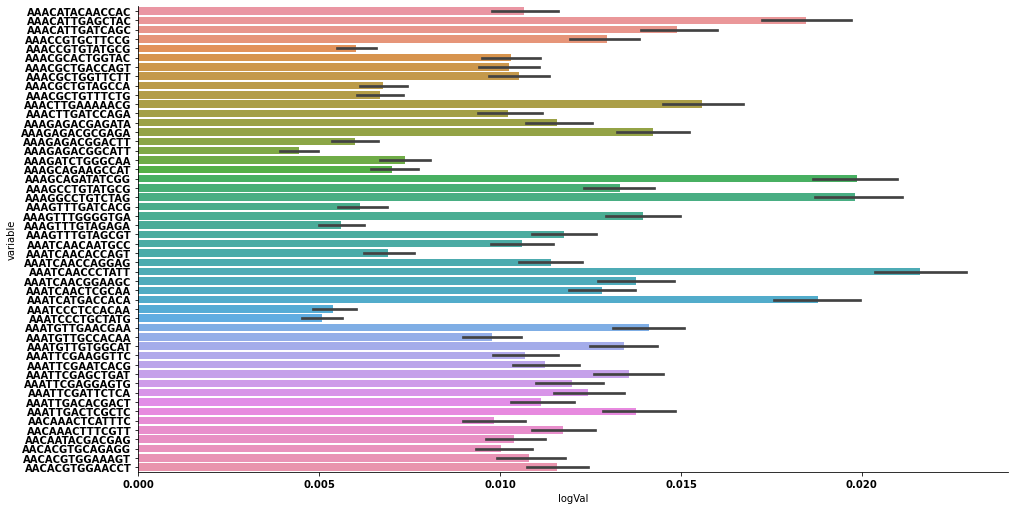

In [114]:
# This now allows us to do this, which was a bit difficult otherwise :
df_sc_long['logVal'] = np.log10(10**0 + df_sc_long['value'])

g = sns.catplot( x='logVal' , y='variable' , orient='horizontal' , data=df_sc_long , 
                kind='bar',
                 aspect = 2 , height = 7 )